In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pickle
legend_properties = {'weight':'bold'}
nus_blue = "#003D7C"
nus_orange = "#EF7C00"
# Nature three colors
nature_orange = "#F16C23"
nature_blue = "#2B6A99"
nature_green = "#1B7C3D"
# Morandi six colors
morandi_blue = "#046586"
morandi_green =  "#28A9A1"
morandi_yellow = "#C9A77C"
morandi_orange = "#F4A016"
morandi_pink = "#F6BBC6"
morandi_red = "#E71F19"
morandi_purple = "#B08BEB"
# Others
shallow_grey = "#D3D4D3"
deep_grey = "#A6ABB6"
# Red and Blue
strong_red = "#A61C5D"
strong_blue = "#1B64A4"

# Shallow-deep pair
shallow_purple = "#EAD7EA"
deep_purple = "#BA9DB9"
shallow_cyan = "#A9D5E0"
deep_cyan = "#48C0BF"
shallow_blue = "#B6DAEC"
deep_blue = "#98CFE4"
shallow_pink = "#F5E0E5"
deep_pink = "#E5A7B6"
shallow_green = "#C2DED0"
deep_green = "#A5C6B1"

color_pairs = [[shallow_purple, deep_purple],  [shallow_green, deep_green],
               [shallow_blue, deep_blue], [shallow_pink, deep_pink], [shallow_cyan, deep_cyan],
               [shallow_grey, deep_grey]]
morandi_colors = [morandi_blue, morandi_green, morandi_yellow, morandi_orange, morandi_pink, morandi_red, morandi_purple]


In [2]:
data_folder = r"/Volumes/T7/data/gst-0112-26/Mechanism_2/Tension_across_k"
gg_confirmation_file = data_folder + r"/gg_joint_confirmation.pkl"
gs_confirmation_file = data_folder + r"/gs_joint_confirmation.pkl"
ss_confirmation_file = data_folder + r"/ss_joint_confirmation.pkl"
sg_confirmation_file = data_folder + r"/sg_joint_confirmation.pkl"

gg_deviation_file = data_folder + r"/gg_mutual_deviation.pkl"
gs_deviation_file = data_folder + r"/gs_mutual_deviation.pkl"
ss_deviation_file = data_folder + r"/ss_mutual_deviation.pkl"
sg_deviation_file = data_folder + r"/sg_mutual_deviation.pkl"

with open(gg_confirmation_file, 'rb') as infile:
    gg_confirmation = pickle.load(infile)
with open(gs_confirmation_file, 'rb') as infile:
    gs_confirmation = pickle.load(infile)
with open(ss_confirmation_file, 'rb') as infile:
    ss_confirmation = pickle.load(infile)
with open(sg_confirmation_file, 'rb') as infile:
    sg_confirmation = pickle.load(infile)

with open(gg_deviation_file, 'rb') as infile:
    gg_deviation = pickle.load(infile)
with open(sg_deviation_file, 'rb') as infile:
    sg_deviation = pickle.load(infile)
with open(ss_deviation_file, 'rb') as infile:
    ss_deviation = pickle.load(infile)
with open(gs_deviation_file, 'rb') as infile:
    gs_deviation = pickle.load(infile)

print(np.array(gg_confirmation).shape)
print(gg_confirmation)

(9,)
[0.0, 0.22282115000000002, 0.20374557000000004, 0.16959474, 0.14153870000000002, 0.12685687, 0.11828135, 0.11341918999999999, 0.11381819]


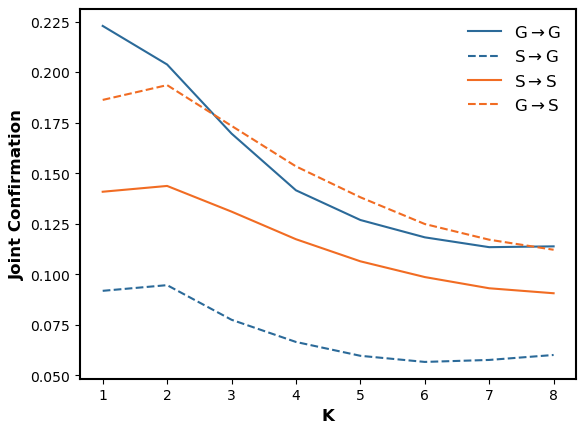

In [3]:
# GST Fitness
# Heterogeneous component will reduce the likelihood of joint confusion
# K increases the likelihood of joint confusion (across-domain interdependency)
# Seems like K also increases the likelihood of mutual climb
# How about (within-domain complexity)?
x = range(1, 9)
fig, ax = plt.subplots()
ax.spines["left"].set_linewidth(1.5)
ax.spines["right"].set_linewidth(1.5)
ax.spines["top"].set_linewidth(1.5)
ax.spines["bottom"].set_linewidth(1.5)
plt.plot(x, gg_confirmation[1:], "-", label=r"G$\rightarrow$G", color=nature_blue)
plt.plot(x, sg_confirmation[1:], "--", label=r"S$\rightarrow$G", color=nature_blue)

plt.plot(x, ss_confirmation[1:], "-", label=r"S$\rightarrow$S", color=nature_orange)
plt.plot(x, gs_confirmation[1:], "--", label=r"G$\rightarrow$S", color=nature_orange)

plt.xlabel('K', fontweight='bold', fontsize=12)
plt.ylabel('Joint Confirmation', fontweight='bold', fontsize=12)
plt.xticks(x)
plt.legend(frameon=False, ncol=1, fontsize=12)
# plt.savefig(data_folder + r"/joint_confirmation_across_k.png", transparent=True, dpi=300)
plt.show()

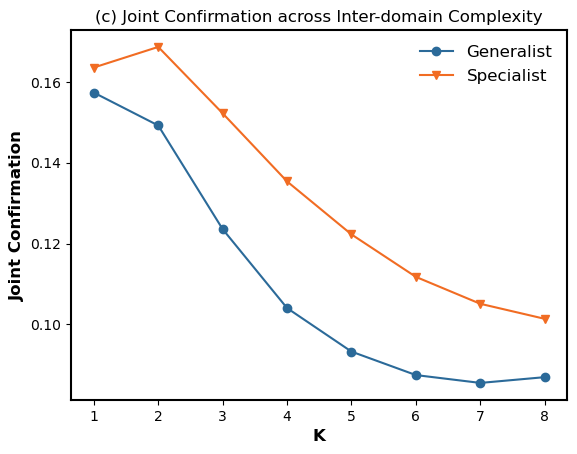

In [5]:
# Integrate Recombination for Simplification
G_confirmation_across_K = []
for gg, sg in zip(gg_confirmation, sg_confirmation):
    new_g = 0.5 * (gg + sg)
    G_confirmation_across_K.append(new_g)
S_confirmation_across_K = []
for ss, gs in zip(ss_confirmation, gs_confirmation):
    new_s = 0.5 * (ss + gs)
    S_confirmation_across_K.append(new_s)

x = range(1, 9)
fig, ax = plt.subplots()
ax.spines["left"].set_linewidth(1.5)
ax.spines["right"].set_linewidth(1.5)
ax.spines["top"].set_linewidth(1.5)
ax.spines["bottom"].set_linewidth(1.5)
plt.plot(x, G_confirmation_across_K[1:], marker='o', linestyle='-', label="Generalist", color=nature_blue)
plt.plot(x, S_confirmation_across_K[1:], marker='v', linestyle='-', label="Specialist", color=nature_orange)
plt.xlabel('K', fontweight='bold', fontsize=12)
plt.ylabel('Joint Confirmation', fontweight='bold', fontsize=12)
plt.xticks(x)
plt.title("(c) Joint Confirmation across Inter-domain Complexity")
plt.legend(frameon=False, ncol=1, fontsize=12)
plt.savefig(data_folder + r"/joint_confirmation_across_k.png", transparent=True, dpi=300)
plt.show()

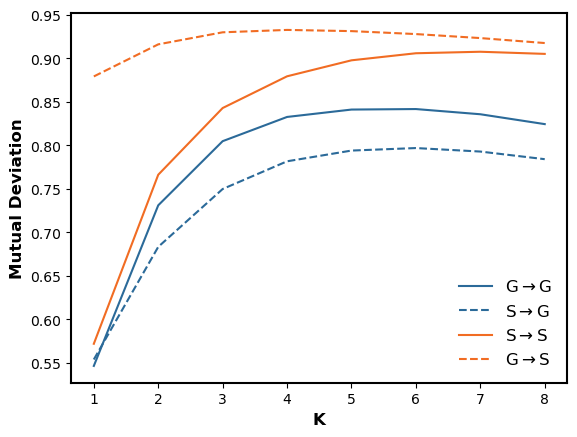

In [31]:
# Mutual Deviation
x = range(1, 9)
fig, ax = plt.subplots()
ax.spines["left"].set_linewidth(1.5)
ax.spines["right"].set_linewidth(1.5)
ax.spines["top"].set_linewidth(1.5)
ax.spines["bottom"].set_linewidth(1.5)
plt.plot(x, gg_deviation[1:], "-", label=r"G$\rightarrow$G", color=nature_blue)
plt.plot(x, sg_deviation[1:], "--", label=r"S$\rightarrow$G", color=nature_blue)

plt.plot(x, ss_deviation[1:], "-", label=r"S$\rightarrow$S", color=nature_orange)
plt.plot(x, gs_deviation[1:], "--", label=r"G$\rightarrow$S", color=nature_orange)

plt.xlabel('K', fontweight='bold', fontsize=12)
plt.ylabel('Mutual Deviation', fontweight='bold', fontsize=12)
plt.xticks(x)
plt.legend(frameon=False, ncol=1, fontsize=12)
plt.savefig(data_folder + r"/mutual_deviation_across_k.png", transparent=True, dpi=300)
plt.show()

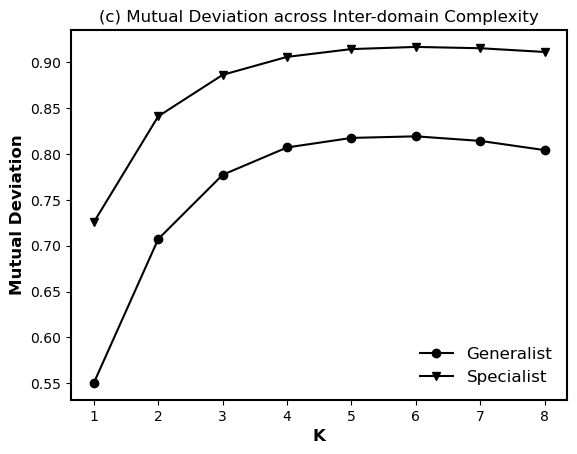

In [32]:
# Integrate Recombination for Simplification
G_deviation_across_K = []
for gg, sg in zip(gg_deviation, sg_deviation):
    new_g = 0.5 * (gg + sg)
    G_deviation_across_K.append(new_g)
S_deviation_across_K = []
for ss, gs in zip(ss_deviation, gs_deviation):
    new_s = 0.5 * (ss + gs)
    S_deviation_across_K.append(new_s)

x = range(1, 9)
fig, ax = plt.subplots()
ax.spines["left"].set_linewidth(1.5)
ax.spines["right"].set_linewidth(1.5)
ax.spines["top"].set_linewidth(1.5)
ax.spines["bottom"].set_linewidth(1.5)
plt.plot(x, G_deviation_across_K[1:], marker='o', linestyle='-', label="Generalist", color="k")
plt.plot(x, S_deviation_across_K[1:], marker='v', linestyle='-', label="Specialist", color="k")
plt.xlabel('K', fontweight='bold', fontsize=12)
plt.ylabel('Mutual Deviation', fontweight='bold', fontsize=12)
plt.xticks(x)
plt.title("(c) Mutual Deviation across Inter-domain Complexity")
plt.legend(frameon=False, ncol=1, fontsize=12)
plt.savefig(data_folder + r"/mutual_deviation_across_k.png", transparent=True, dpi=300)
plt.show()

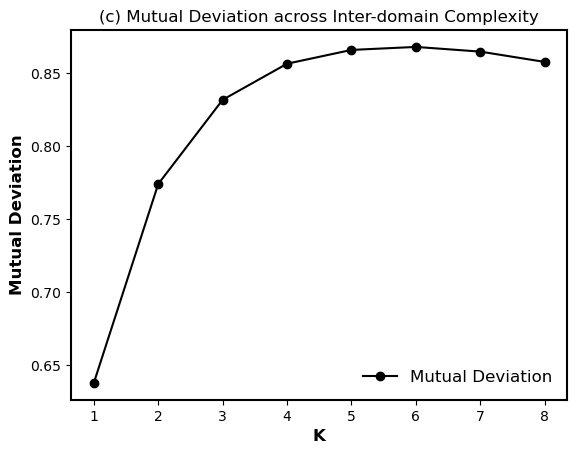

In [33]:
# Integrated Tension
deviation_across_K = []
for g, s in zip(G_deviation_across_K, S_deviation_across_K):
    ave_g_s = 0.5 * (g + s)
    deviation_across_K.append(ave_g_s)

x = range(1, 9)
fig, ax = plt.subplots()
ax.spines["left"].set_linewidth(1.5)
ax.spines["right"].set_linewidth(1.5)
ax.spines["top"].set_linewidth(1.5)
ax.spines["bottom"].set_linewidth(1.5)
plt.plot(x, deviation_across_K[1:], marker='o', linestyle='-', label="Mutual Deviation", color="k")
plt.xlabel('K', fontweight='bold', fontsize=12)
plt.ylabel('Mutual Deviation', fontweight='bold', fontsize=12)
plt.xticks(x)
plt.title("(c) Mutual Deviation across Inter-domain Complexity")
plt.legend(frameon=False, ncol=1, fontsize=12)
# plt.savefig(data_folder + r"/mutual_deviation_across_k.png", transparent=True, dpi=300)
plt.show()

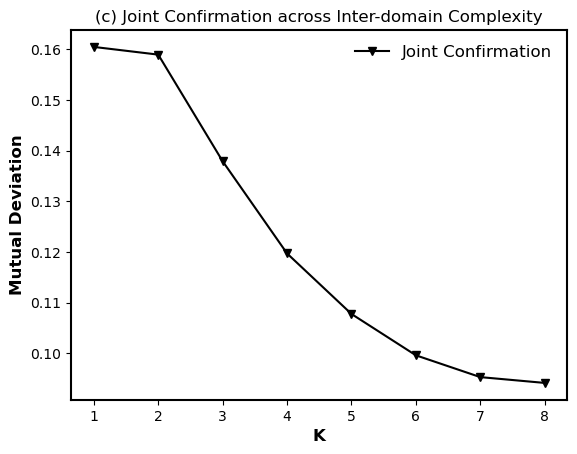

In [36]:
# Integrated Tension
confirmation_across_K = []
for g, s in zip(G_confirmation_across_K, S_confirmation_across_K):
    ave_g_s = 0.5 * (g + s)
    confirmation_across_K.append(ave_g_s)

x = range(1, 9)
fig, ax = plt.subplots()
ax.spines["left"].set_linewidth(1.5)
ax.spines["right"].set_linewidth(1.5)
ax.spines["top"].set_linewidth(1.5)
ax.spines["bottom"].set_linewidth(1.5)
plt.plot(x, confirmation_across_K[1:], marker='v', linestyle='-', label="Joint Confirmation", color="k")
plt.xlabel('K', fontweight='bold', fontsize=12)
plt.ylabel('Mutual Deviation', fontweight='bold', fontsize=12)
plt.xticks(x)
plt.title("(c) Joint Confirmation across Inter-domain Complexity")
plt.legend(frameon=False, ncol=1, fontsize=12)
# plt.savefig(data_folder + r"/mutual_deviation_across_k.png", transparent=True, dpi=300)
plt.show()

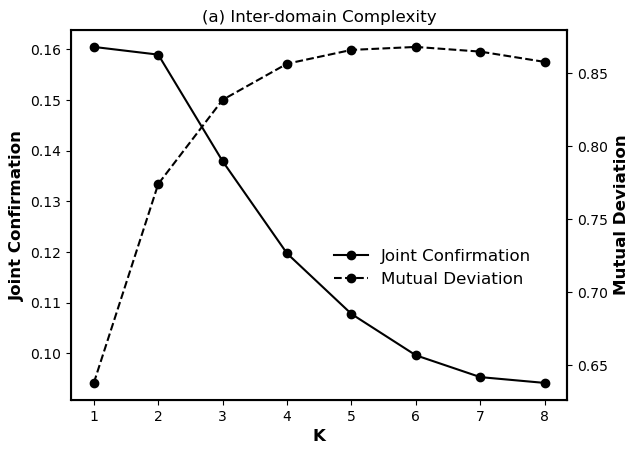

In [45]:
# ---- Integrated Measures ----
deviation_across_K = []
confirmation_across_K = []

for g, s in zip(G_deviation_across_K, S_deviation_across_K):
    deviation_across_K.append(0.5 * (g + s))

for g, s in zip(G_confirmation_across_K, S_confirmation_across_K):
    confirmation_across_K.append(0.5 * (g + s))

x = range(1, 9)

# ---- Plot ----
fig, ax1 = plt.subplots()

# Spine thickness
for spine in ["left", "right", "top", "bottom"]:
    ax1.spines[spine].set_linewidth(1.5)

# Left y-axis: Joint Confirmation
line1, = ax1.plot(
    x,
    confirmation_across_K[1:],
    marker='o',
    linestyle='-',
    color='k',
    label='Joint Confirmation'
)
ax1.set_xlabel('K', fontweight='bold', fontsize=12)
ax1.set_ylabel('Joint Confirmation', fontweight='bold', fontsize=12)
ax1.set_xticks(x)

# Right y-axis: Mutual Deviation
ax2 = ax1.twinx()
ax2.spines["right"].set_linewidth(1.5)

line2, = ax2.plot(
    x,
    deviation_across_K[1:],
    marker='o',
    linestyle='--',
    color='k',
    label='Mutual Deviation'
)
ax2.set_ylabel('Mutual Deviation', fontweight='bold', fontsize=12)

# ---- Legend (Adjustable Position) ----
lines = [line1, line2]
labels = [l.get_label() for l in lines]

legend = ax1.legend(
    lines,
    labels,
    frameon=False,
    fontsize=12,
    loc='upper left',          # anchor corner
    bbox_to_anchor=(0.5, 0.45)  # (x, y) fine control
)

# ---- Title ----
plt.title("(a) Inter-domain Complexity")
plt.savefig(data_folder + r"/tension_across_k.png", transparent=True, dpi=300)
plt.show()
